### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pickle

### 1. Open Typeform Data from Survey

In [28]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,cb2hsyhk4q48anbuacl1cb2hspesvqca,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:55:47,2023-05-18 05:58:06,31494a64d0,;,NaN
1,1lvp0ymwpl878xcfgo1lvp0yhw1vy0ld,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,...,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!,2023-05-18 05:36:34,2023-05-18 05:38:17,26873d694b,;,NaN
2,t5e8kn9ug41t5zdgpgnt5e8kn9dx7xba,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,...,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:31:31,2023-05-18 05:33:35,6050316def,;,NaN
3,lhrk180jtc1swhx2plhrk18wntdhnix6,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,...,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!,2023-05-18 05:22:13,2023-05-18 05:23:42,903866689d,;,NaN
4,6mv5t8yarw67kj343annxsb6mv5t8yhx,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,...,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €,2023-05-18 05:05:50,2023-05-18 05:08:08,1acecc257c,;,NaN


### Lets remove some unnecesary columns that disturb us

In [29]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: Help Eco, save money, save water or know water footprint. 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet: 3 pet food expenditures and 1 option stating that he has not any pet.
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [30]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Paint some Data 👨🏻‍🎨

In [31]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

Age
Entre 36 y 65 años    652
Entre 18 y 35 años    425
Mayor de 65 años       82
Menor de 18 años       19
NaN                     4
Name: count, dtype: int64


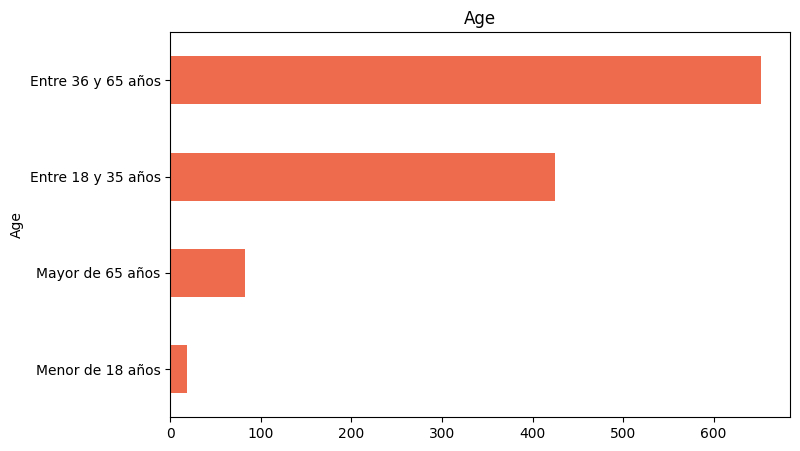

Residents
2.0     354
4.0     293
3.0     287
1.0     118
5.0      99
6.0      16
7.0       6
NaN       4
8.0       3
10.0      2
Name: count, dtype: int64


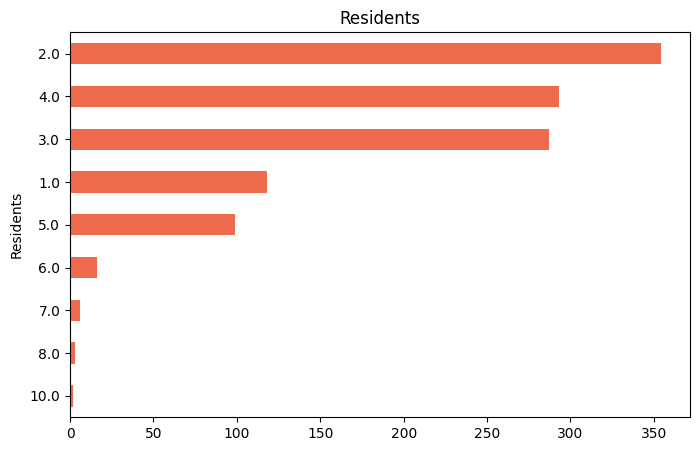

Province
Madrid                    638
Segovia                   201
Asturias                   49
Barcelona                  36
Sevilla                    27
Toledo                     22
Valladolid                 15
Cantabria                  15
Cádiz                      14
A Coruña                   10
Zaragoza                   10
Málaga                      9
Murcia                      7
Huesca                      7
Pontevedra                  7
Valencia                    7
Alicante                    6
Vizcaya                     6
Lugo                        5
Gipuzkoa                    5
Burgos                      5
Las Palmas                  5
Jaén                        5
León                        4
Salamanca                   4
Girona                      4
Huelva                      4
Ávila                       4
La Rioja                    3
NaN                         3
Badajoz                     3
Tarragona                   3
Castellón                   3
S

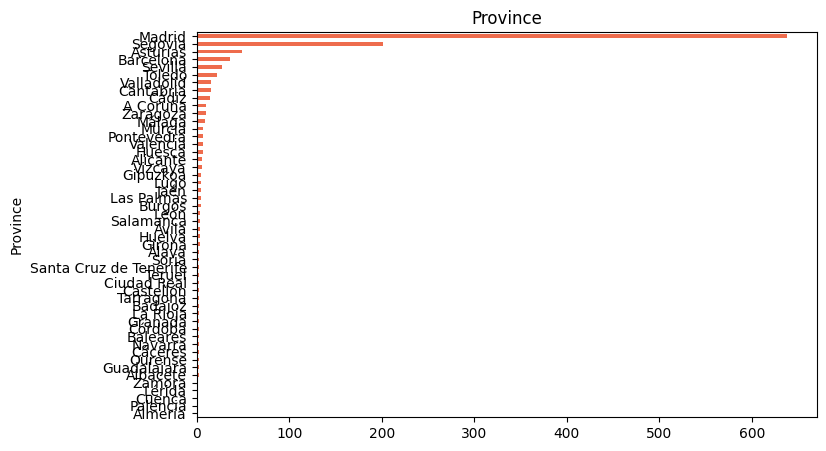

Interests
Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               268
Conocer mi huella hídrica    142
NaN                            3
Name: count, dtype: int64


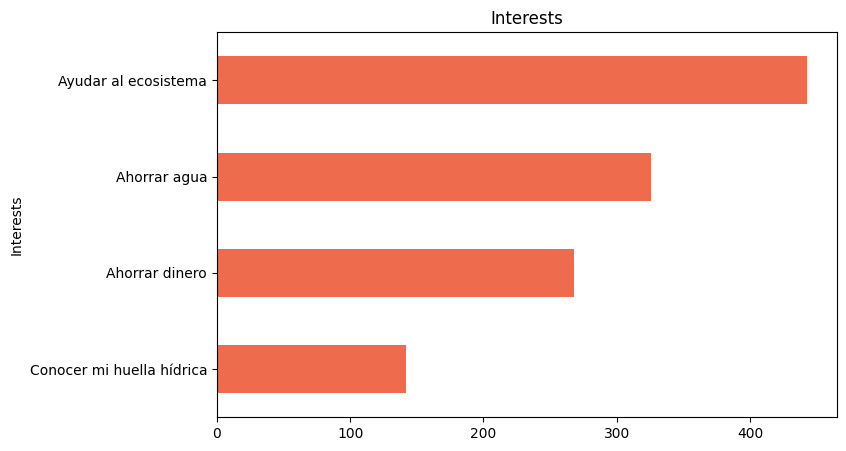

Shower
Entre 5 y 10 minutos     594
Menos de 5 minutos       411
Entre 11 y 15 minutos    136
Más de 15 minutos         38
NaN                        3
Name: count, dtype: int64


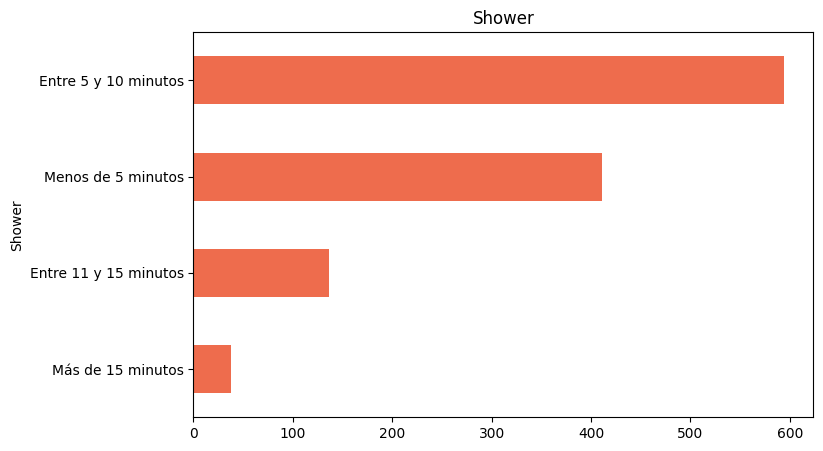

WashingMachine
Menos de 3 veces     638
Entre 3 y 5 veces    420
Más de 5             121
NaN                    3
Name: count, dtype: int64


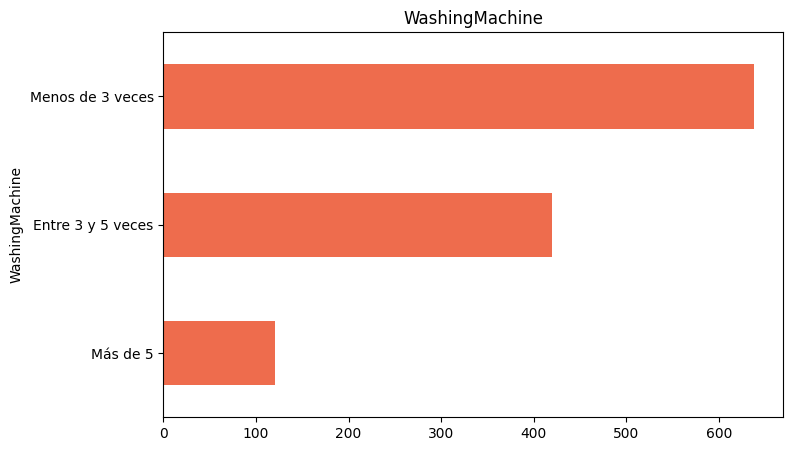

DishWasher
Entre 3 y 5 a la semana    603
Friego a mano              347
1 vez al día               229
NaN                          3
Name: count, dtype: int64


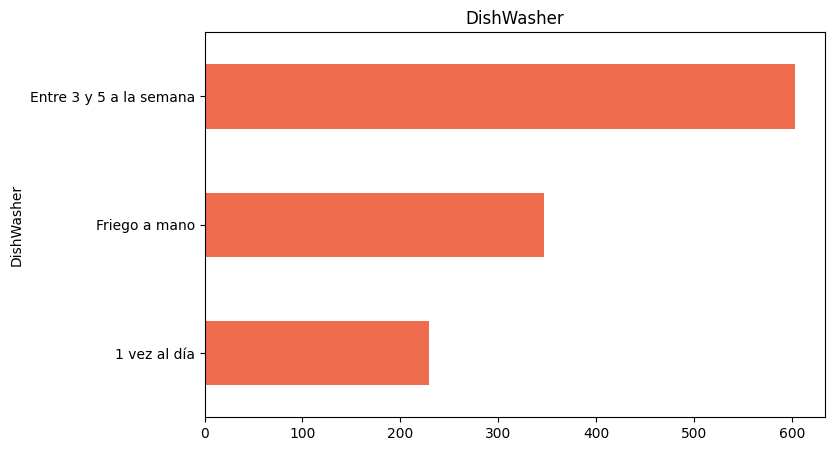

EcoMode
Siempre                          549
A veces                          475
No sabía que existía ese modo    155
NaN                                3
Name: count, dtype: int64


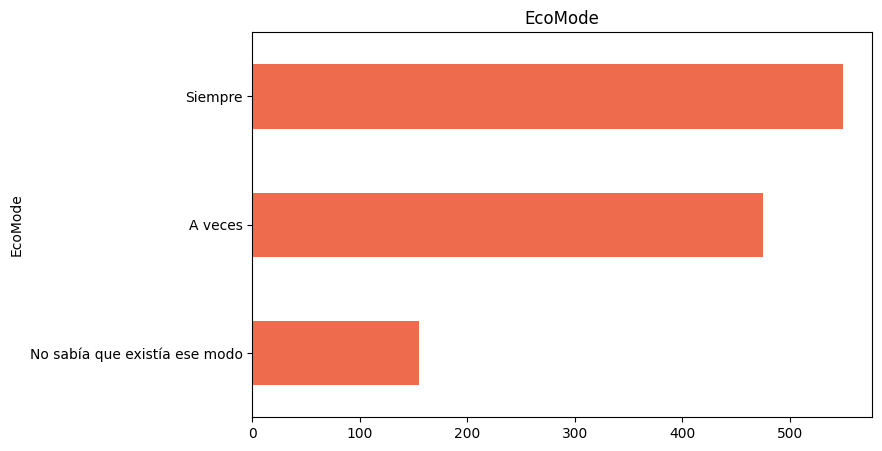

WaterRecycling
No                             604
Si                             350
Buena idea! Voy a probarlo!    225
NaN                              3
Name: count, dtype: int64


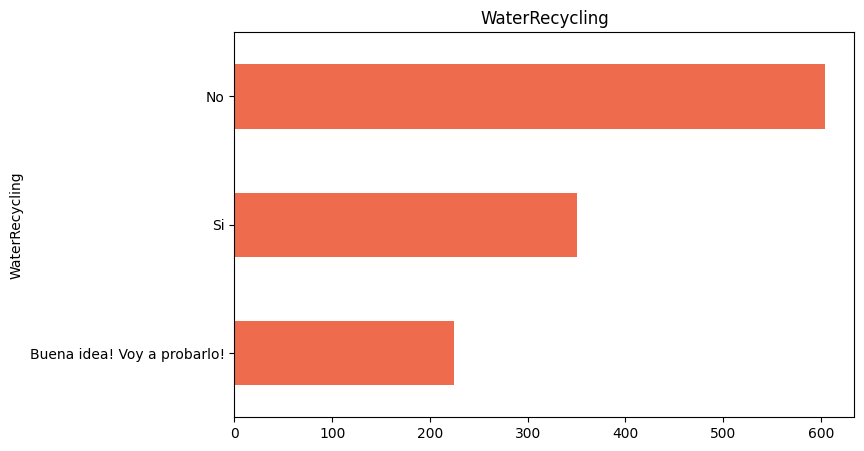

GeneralRecycling
Siempre    829
A veces    294
Nunca!      56
NaN          3
Name: count, dtype: int64


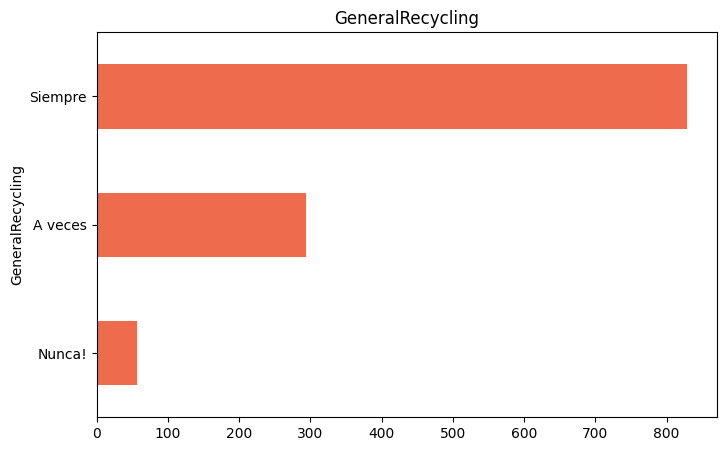

Meat
1 vez cada 3 días    575
1 vez al día         376
1 vez a la semana    189
Nunca!                39
NaN                    3
Name: count, dtype: int64


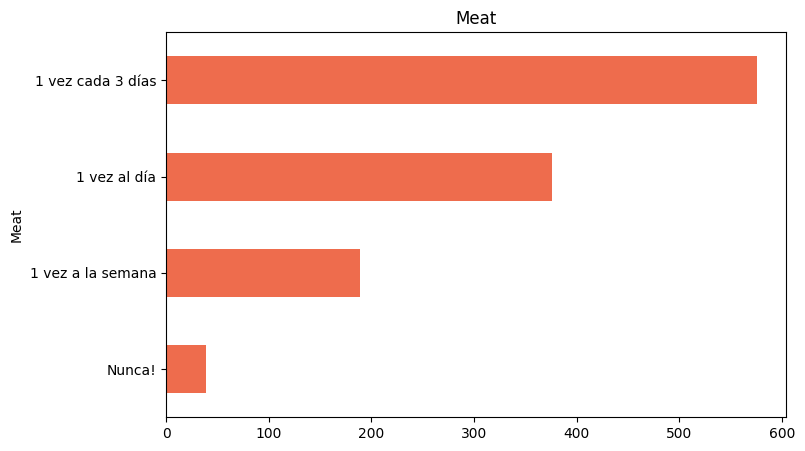

Gasoline
Menos de 100 km    538
No uso coche       289
100 - 200 km       211
Más de 200 km      141
NaN                  3
Name: count, dtype: int64


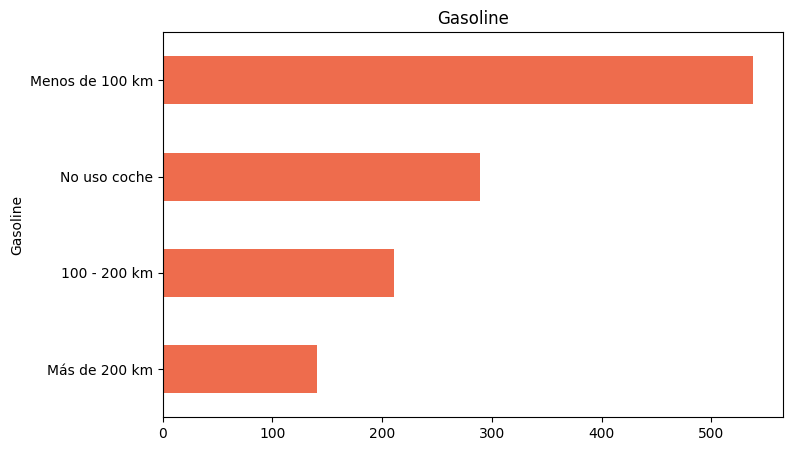

Pet
No tengo mascota    756
Menos de 50 €       265
Entre 50 y 100 €    142
Más de 100 €         16
NaN                   3
Name: count, dtype: int64


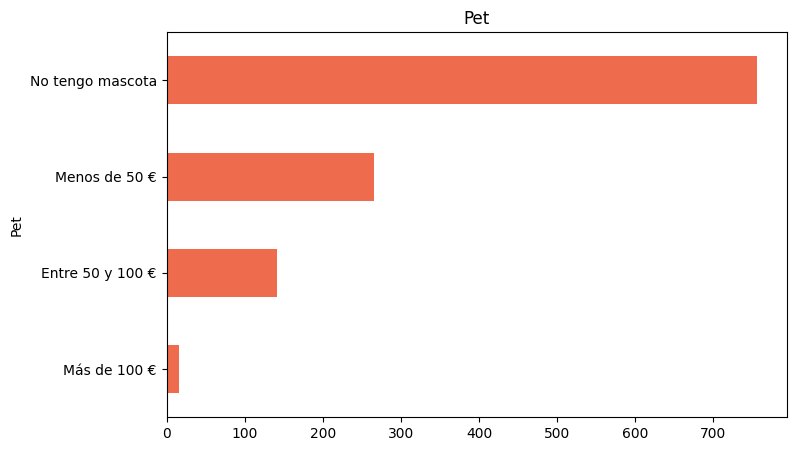

Garden
0              805
NaN             65
50              20
10              18
100             17
              ... 
75               1
2.0              1
6                1
300m             1
Ojalá tener      1
Name: count, Length: 96, dtype: int64


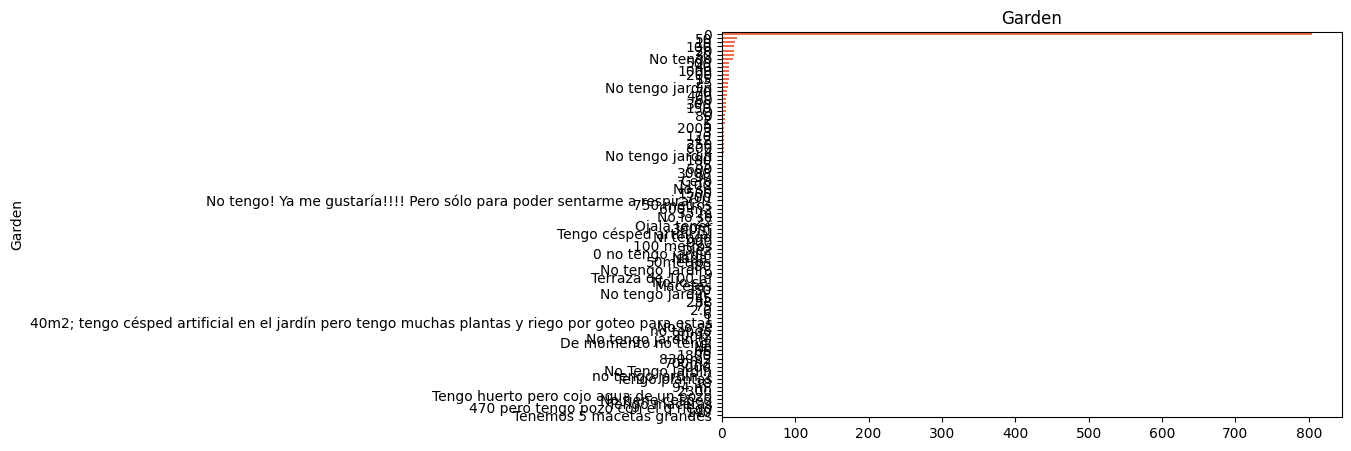

Estimation
Entre 10€ y 40 €    594
Ni idea!            333
Más de 40 €         163
Menos de 10 €        88
NaN                   4
Name: count, dtype: int64


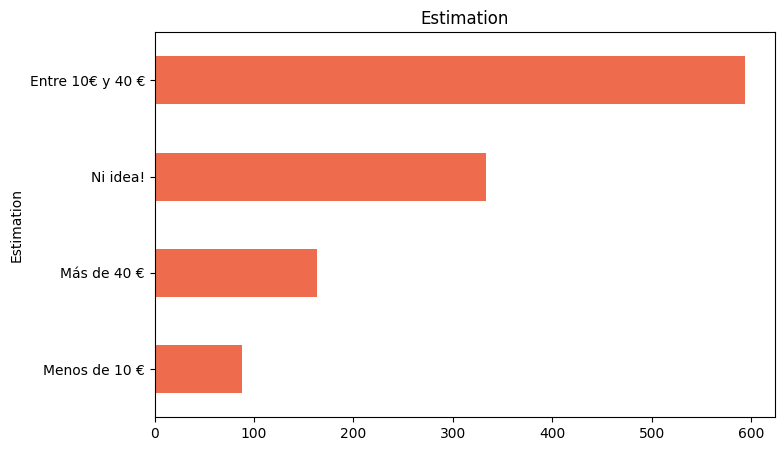

In [32]:
def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list:
    plot_graph(i)


#### Check and Handle NaN



In [33]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1182


Age                  4
Residents            4
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              65
Estimation           4
dtype: int64

In [34]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Feature Engineering

Since our survery was initially launched to get numeric and categorical data we are going to slightly format certain features in order to prepare better our data to train our ML model algorithms

In [35]:
# Pet: we are interested in knowing if they have or not.
df.loc[df["Pet"] == 'No tengo mascota', "Pet"] = "No"
df.loc[df["Pet"] != 'No', "Pet"] = "Yes"

### Car: we are interested in knowing if they use the car or not.
df.loc[df["Gasoline"] == 'No uso coche', "Gasoline"] = "No"
df.loc[df["Gasoline"] != 'No', "Gasoline"] = "Yes"

# Meat: we are interested in knowing if they are meat eaters or not.
df.loc[df["Meat"] == 'Nunca!', "Meat"] = "No"
df.loc[df["Meat"] == '1 vez a la semana', "Meat"] = "No"
df.loc[df["Meat"] != 'No', "Meat"] = "Yes"

# Estimation: we are interested in knowing if they are aware with their water expenditure or not.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

# WaterRecylcing: Include will try and yes => yes.
df.loc[df["WaterRecycling"] != 'No', "WaterRecycling"] = "Yes"


# Age: Yound and Old.
df.loc[df["Age"] == 'Entre 36 y 65 años', "Age"] = "Old"
df.loc[df["Age"] == 'Mayor de 65 años', "Age"] = "Old"
df.loc[df["Age"] != 'Old', "Age"] = "Young"



# Shower: 3 ranges.
df.loc[df["Shower"] == 'Menos de 5 minutos', "Shower"] = "Saver"
df.loc[df["Shower"] == 'Entre 5 y 10 minutos', "Shower"] = "Medium"
df.loc[df["Shower"] == 'Entre 11 y 15 minutos', "Shower"] = "Large"
df.loc[df["Shower"] == 'Más de 15 minutos', "Shower"] = "Large"



# Eliminar

df.drop(columns=["Residents","Province"], inplace=True)
 
# Provincias
# Residents



### Lets look into Garden column since we found out there were over 65 values that we need to look into 🌷

In [36]:
#Primero necesitamos convertir la columna a str
df['Garden'] = df['Garden'].astype(str)

#Nos ayudamos de expresiones regulares
import re
def transformar_registro(registro):
    if registro.isdigit():
        return int(registro)
    else:
        numero_encontrado = re.search(r'\d+', registro)
        if numero_encontrado:
            return int(numero_encontrado.group())
        else:
            return 0
            
#hacemos la transformación correspondiente
df['Garden'] = df['Garden'].apply(transformar_registro)


In [37]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,0,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,300,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,0,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,0,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,2,Yes


In [38]:
# Shower: 3 ranges.
df.loc[df["Garden"] == 0, "Garden"] = "No"
df.loc[df["Garden"] != "No", "Garden"] = "Yes"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1182 non-null   object
 1   Interests         1179 non-null   object
 2   Shower            1179 non-null   object
 3   WashingMachine    1179 non-null   object
 4   DishWasher        1179 non-null   object
 5   EcoMode           1179 non-null   object
 6   WaterRecycling    1182 non-null   object
 7   GeneralRecycling  1179 non-null   object
 8   Meat              1182 non-null   object
 9   Gasoline          1182 non-null   object
 10  Pet               1182 non-null   object
 11  Garden            1182 non-null   object
 12  Estimation        1182 non-null   object
dtypes: object(13)
memory usage: 120.2+ KB


In [39]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


Garden
No     927
Yes    255
Name: count, dtype: int64


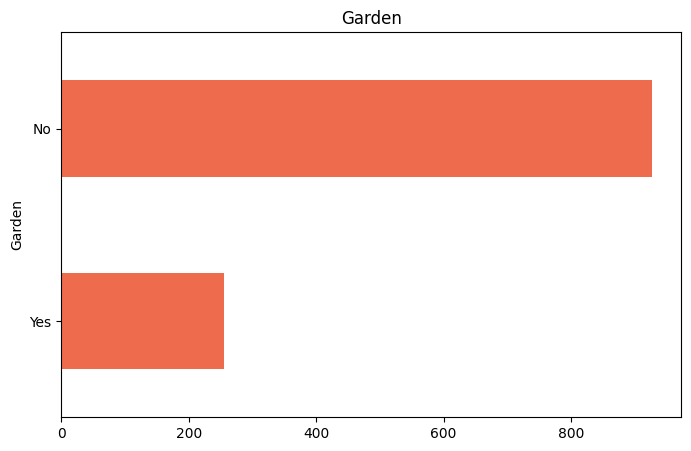

In [40]:
plot_graph("Garden")

In [41]:
# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1182


Age                 0
Interests           3
Shower              3
WashingMachine      3
DishWasher          3
EcoMode             3
WaterRecycling      0
GeneralRecycling    3
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

In [42]:
# Save Garden results in Excel to view ALL of them
# values = df["Garden"]
# values.to_excel(r'./results/garden_clean.xlsx',sheet_name='train', index=False)

In [43]:
# Remove rows with NaN values
df = df.dropna()

print("Length with NaN removed: ",len(df))
# Check all are removed
df.isna().sum()

Length with NaN removed:  1179


Age                 0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

## Check All modified columns

Age
Old      734
Young    445
Name: count, dtype: int64


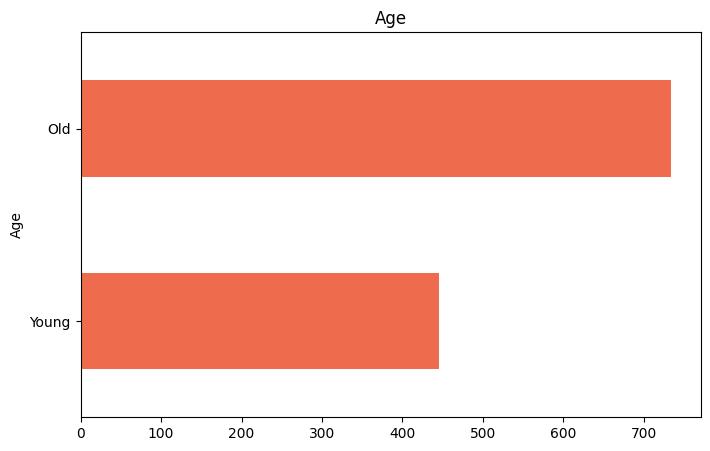

Interests
Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               268
Conocer mi huella hídrica    142
Name: count, dtype: int64


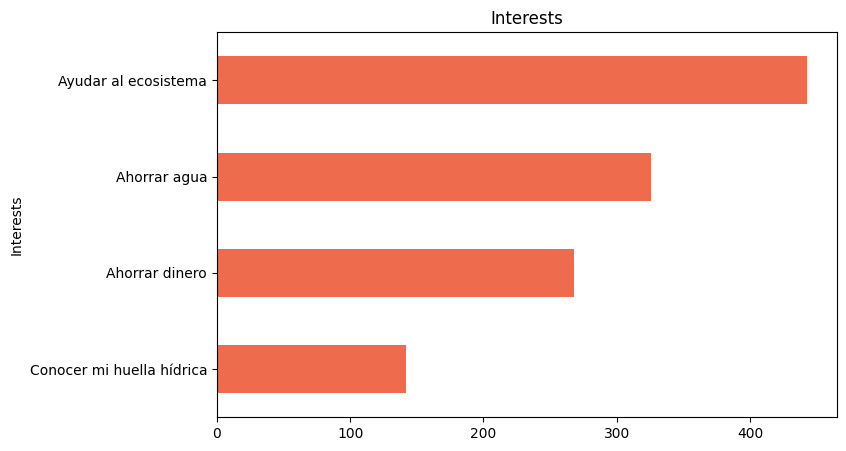

Shower
Medium    594
Saver     411
Large     174
Name: count, dtype: int64


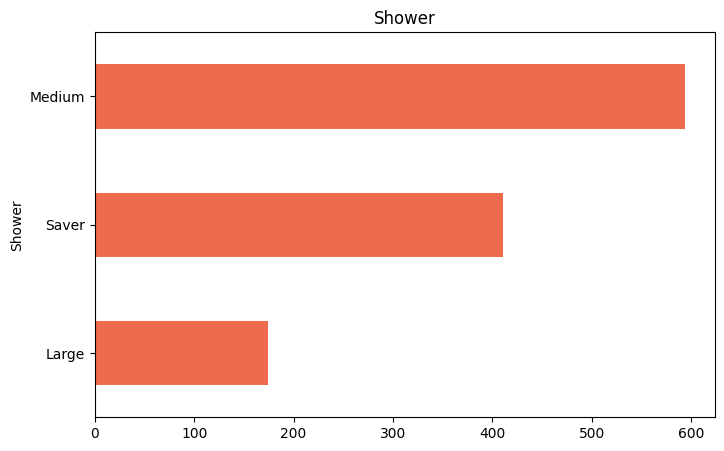

WashingMachine
Menos de 3 veces     638
Entre 3 y 5 veces    420
Más de 5             121
Name: count, dtype: int64


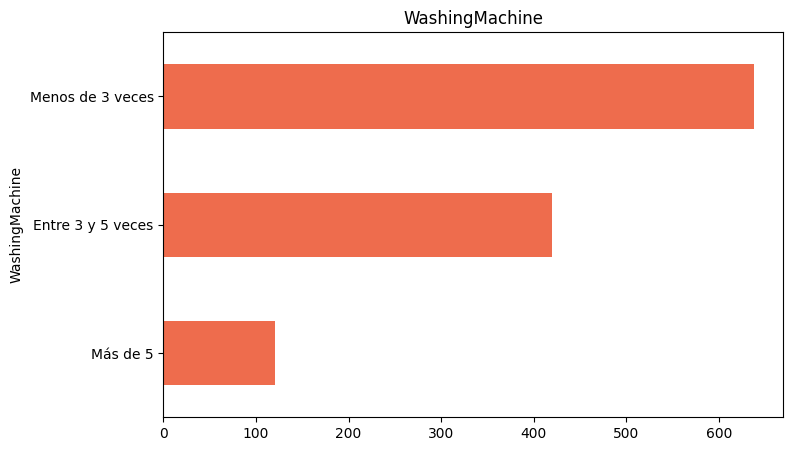

DishWasher
Entre 3 y 5 a la semana    603
Friego a mano              347
1 vez al día               229
Name: count, dtype: int64


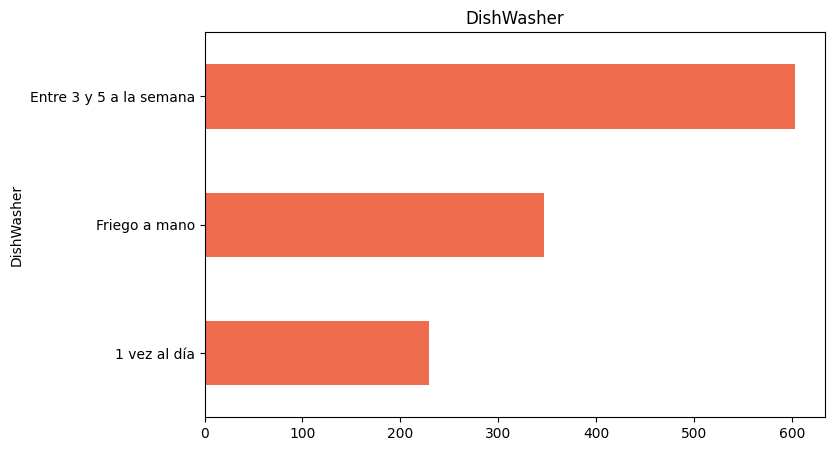

EcoMode
Siempre                          549
A veces                          475
No sabía que existía ese modo    155
Name: count, dtype: int64


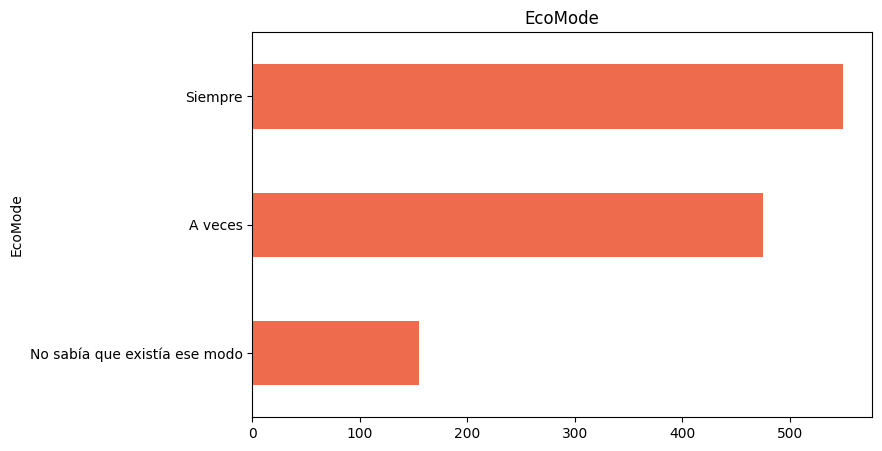

WaterRecycling
No     604
Yes    575
Name: count, dtype: int64


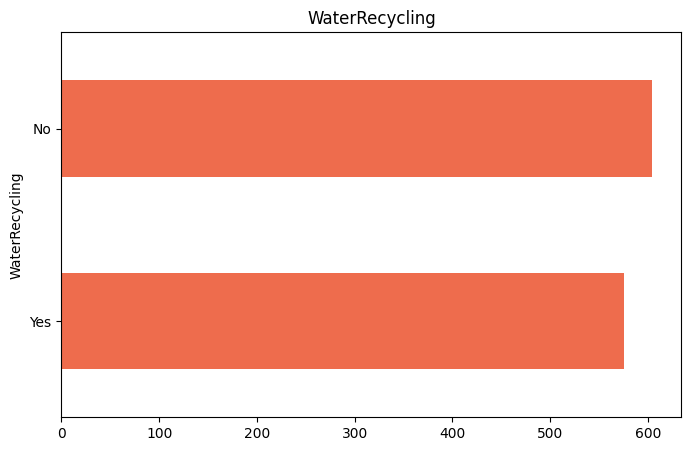

GeneralRecycling
Siempre    829
A veces    294
Nunca!      56
Name: count, dtype: int64


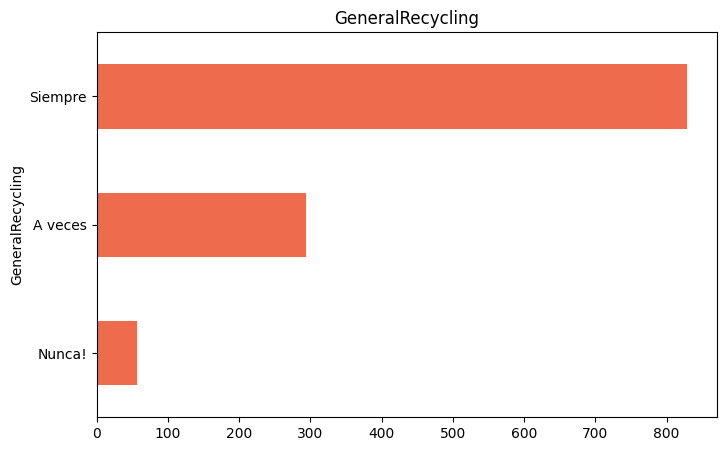

Meat
Yes    951
No     228
Name: count, dtype: int64


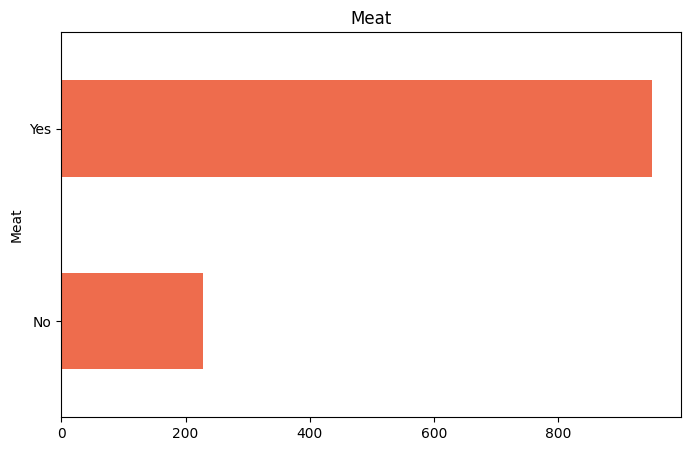

Gasoline
Yes    890
No     289
Name: count, dtype: int64


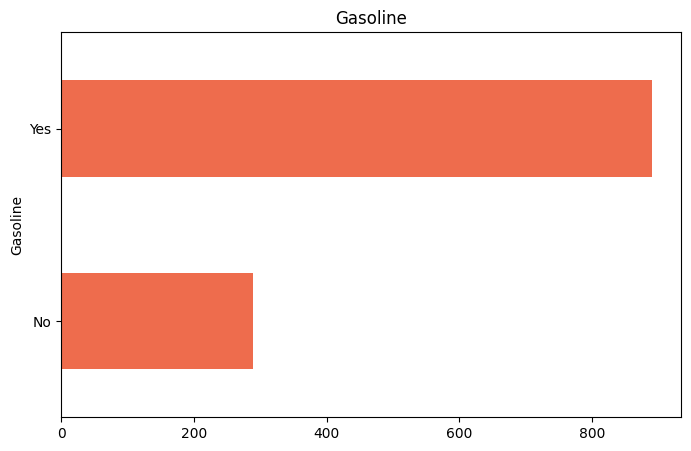

Pet
No     756
Yes    423
Name: count, dtype: int64


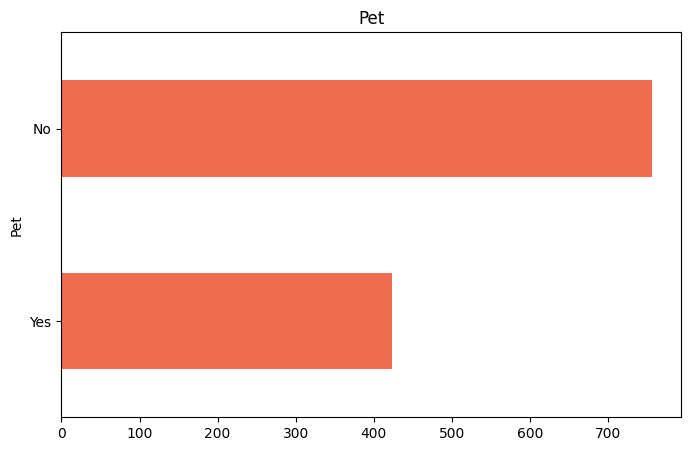

Garden
No     924
Yes    255
Name: count, dtype: int64


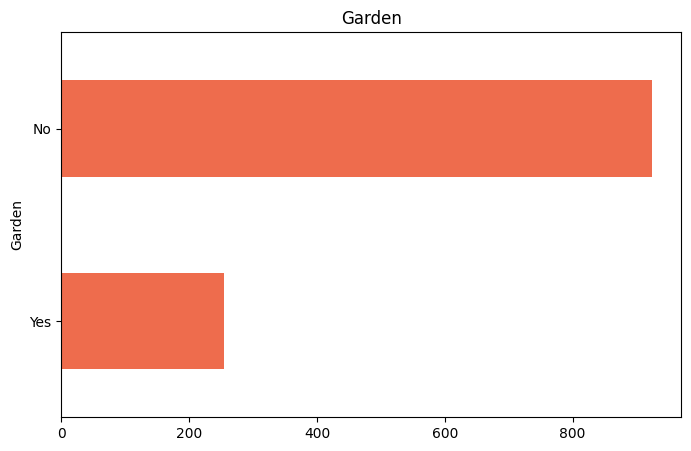

Estimation
Yes    846
No     333
Name: count, dtype: int64


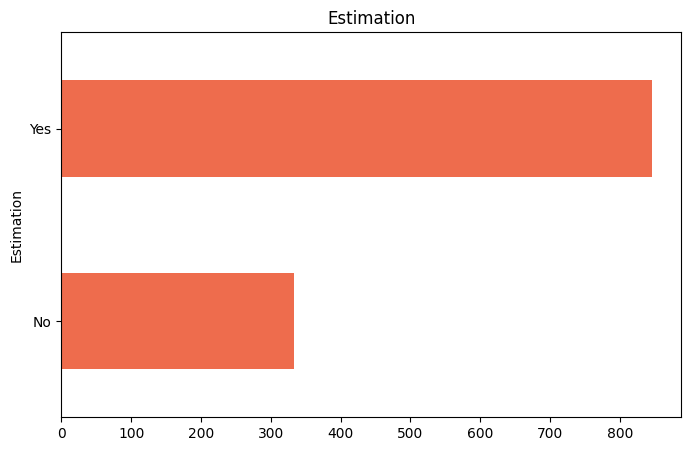

In [44]:
list_modified = [ "Age",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]



def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list_modified:
    plot_graph(i)

In [45]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


### Transmitting human intention (eco friendly) to Machine Learning model

In [46]:
# ECO FRIENDLY => 0
# MENOS ECO => 1
# MENOS MENOS ECO => 2

# Gasoline
df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 1
df.loc[df["Gasoline"] == "No", "Gasoline"] = 0

# Interests
df.loc[df["Interests"] == "Ayudar al ecosistema", "Interests"] = 0
df.loc[df["Interests"] == "Ahorrar agua", "Interests"] = 0
df.loc[df["Interests"] == "Conocer mi huella hídrica", "Interests"] = 1
df.loc[df["Interests"] == "Ahorrar dinero", "Interests"] = 2

# WaterRecycling
df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 0
df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 1

# Meat
df.loc[df["Meat"] == "No", "Meat"] = 0
df.loc[df["Meat"] == "Yes", "Meat"] = 1

# Shower
df.loc[df["Shower"] == "Saver", "Shower"] = 0
df.loc[df["Shower"] == "Medium", "Shower"] = 1
df.loc[df["Shower"] == "Large", "Shower"] = 2

# WashingMachine
df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 0
df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 1
df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 2

# DishWasher
df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 0
df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 1
df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 2

# EcoMode
df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 0
df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 1
df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 2

# GeneralRecycling
df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 0
df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 1
df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 2


In [47]:
# Save to csv

df.to_csv(r'./data/df_to_play.csv', index=False)

### One-hot encoding categorical features ( Age, Estimation, Pet, Garden)



In [48]:
df = pd.get_dummies(df, columns= ["Age","Estimation","Pet","Garden"])

df.head()

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,1,1,True,False,True,False,True,False,True,False
1,0,0,0,1,0,1,1,1,1,True,False,True,False,True,False,False,True
2,2,0,0,2,2,1,1,0,1,True,False,True,False,True,False,True,False
3,0,1,0,2,0,1,1,1,1,False,True,True,False,True,False,True,False
4,0,1,0,2,1,0,0,1,0,True,False,False,True,True,False,False,True


### Transform column type format for k-means

In [49]:
column_name = df.select_dtypes(include=['uint8',"object","bool"]).columns
df[column_name] = df[column_name].astype('int64')

In [50]:
df_for_ML = df
df_for_ML

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
2,2,0,0,2,2,1,1,0,1,1,0,1,0,1,0,1,0
3,0,1,0,2,0,1,1,1,1,0,1,1,0,1,0,1,0
4,0,1,0,2,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2,0,2,1,2,1,2,0,1,1,0,0,1,1,0,1,0
1178,1,2,0,1,1,0,1,1,1,0,1,0,1,0,1,1,0
1179,2,1,1,2,1,1,0,1,1,0,1,0,1,1,0,1,0
1180,2,2,1,2,1,1,1,1,0,1,0,0,1,1,0,1,0


In [51]:
df_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1181
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Interests         1179 non-null   int64
 1   Shower            1179 non-null   int64
 2   WashingMachine    1179 non-null   int64
 3   DishWasher        1179 non-null   int64
 4   EcoMode           1179 non-null   int64
 5   WaterRecycling    1179 non-null   int64
 6   GeneralRecycling  1179 non-null   int64
 7   Meat              1179 non-null   int64
 8   Gasoline          1179 non-null   int64
 9   Age_Old           1179 non-null   int64
 10  Age_Young         1179 non-null   int64
 11  Estimation_No     1179 non-null   int64
 12  Estimation_Yes    1179 non-null   int64
 13  Pet_No            1179 non-null   int64
 14  Pet_Yes           1179 non-null   int64
 15  Garden_No         1179 non-null   int64
 16  Garden_Yes        1179 non-null   int64
dtypes: int64(17)
memory usage: 165.8 KB
